# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

****LOS PRINCIPALES DATOS QUE DEBERIA OBTENER PARA AYUDARME CON EL PROBLEMA SERIAN LOS SIGUIENTES:

- PRECIOS DE LOS INMUEBLES EN LA ACTUALIDAD
- UBICACIÓN DE LOS MISMOS
- CANTIDAD DE M2 O SUPERFICIE TOTAL Y SUPERFICIE CUBIERTA
- NUMERO DE CUARTOS
- TIPO DE INMUEBLE

TODOS ESTOS DATOS SON IMPORTANTES DEBIDO A QUE EN FUNCIÓN A MI COMPORTAMIENTO ANTERIOR Y LA CORRELACIÓN ENTRE LOS MENCIONADOS DATOS VOY A PODER ARMAR UN MODELO DE PREDICCIÓN QUE ME PERMITA OBTENER DATOS CORRECTOS QUE SE ASEMEJEN A LA REALIDAD****

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
# Importamos las librerias a utilizar.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
#Cargamos nuestro dataset properati.
properati = pd.read_csv("/Users/feliorelo/Documents/ACAMICA 2020/DS_Proyecto_01_Datos_Properati.csv")

In [3]:
#Observamos los primeros cinco valores de nuestro dataset
properati.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [4]:
#El dataset tiene 146660 filas y 19 columnas(atributos).
properati.shape

(146660, 19)

In [5]:
#Observamos el nombre de las columnas de nuestro dataset.
properati.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [6]:
#En esta celda podemos observar el promedio de los valores, la distribución estandar, el mín y el máx, además de los cuartiles.
properati.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [7]:
#Cantidad de instancias por atributo.
properati.count()

start_date         146660
end_date           146660
created_on         146660
lat                136735
lon                136701
l1                 146660
l2                 146660
l3                 146660
rooms              146660
bedrooms           146660
bathrooms          140703
surface_total      126133
surface_covered    125046
price              146660
currency           146660
title              146660
description        146660
property_type      146660
operation_type     146660
dtype: int64

In [8]:
# Instancias nulas o valores faltantes por columna.
properati.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [9]:
# CANTIDAD POR TIPO DE PROPIEDAD.
properati['property_type'].value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

<AxesSubplot:xlabel='property_type', ylabel='count'>

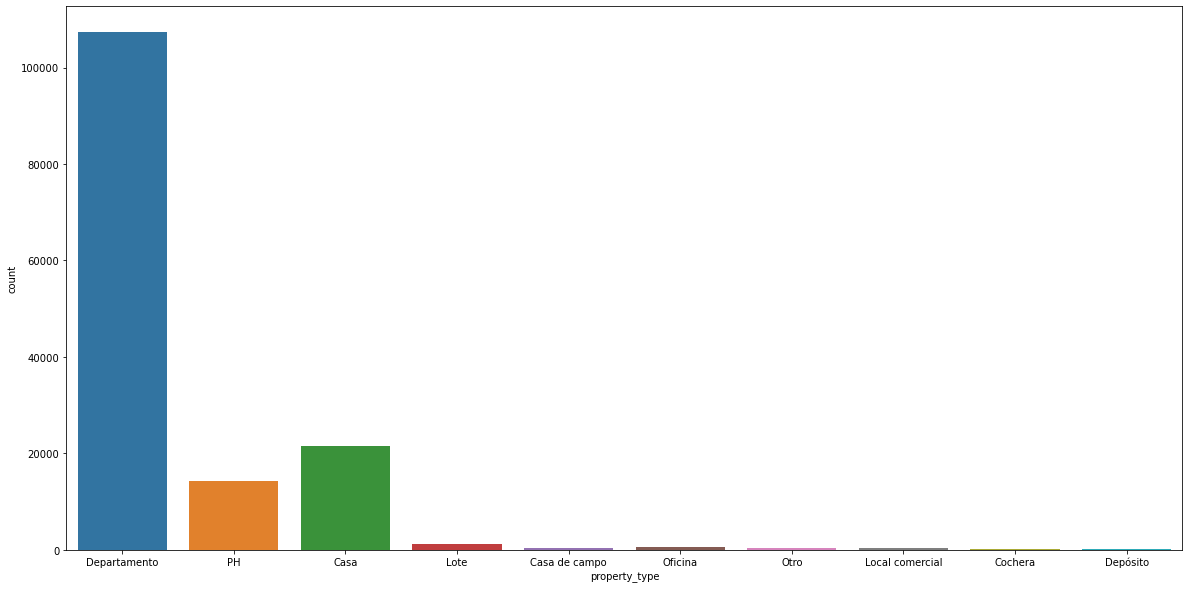

In [10]:
plt.figure(figsize=(20, 10))
sns.countplot(data = properati, x = "property_type")

En el gráfico podemos observar que la mayor cantidad de inmuebles son "Departamentos", "Casas" y "PH"

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

<AxesSubplot:xlabel='count', ylabel='l2'>

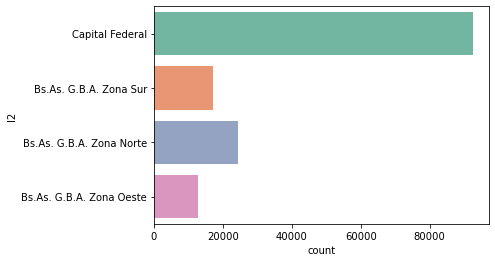

In [11]:
sns.countplot(data = properati, y = 'l2', palette = "Set2")

Gráfico que detalla de donde provienen las publicaciones, principalmente podemos observar que provienen de Capital Federal.

<AxesSubplot:xlabel='count', ylabel='l3'>

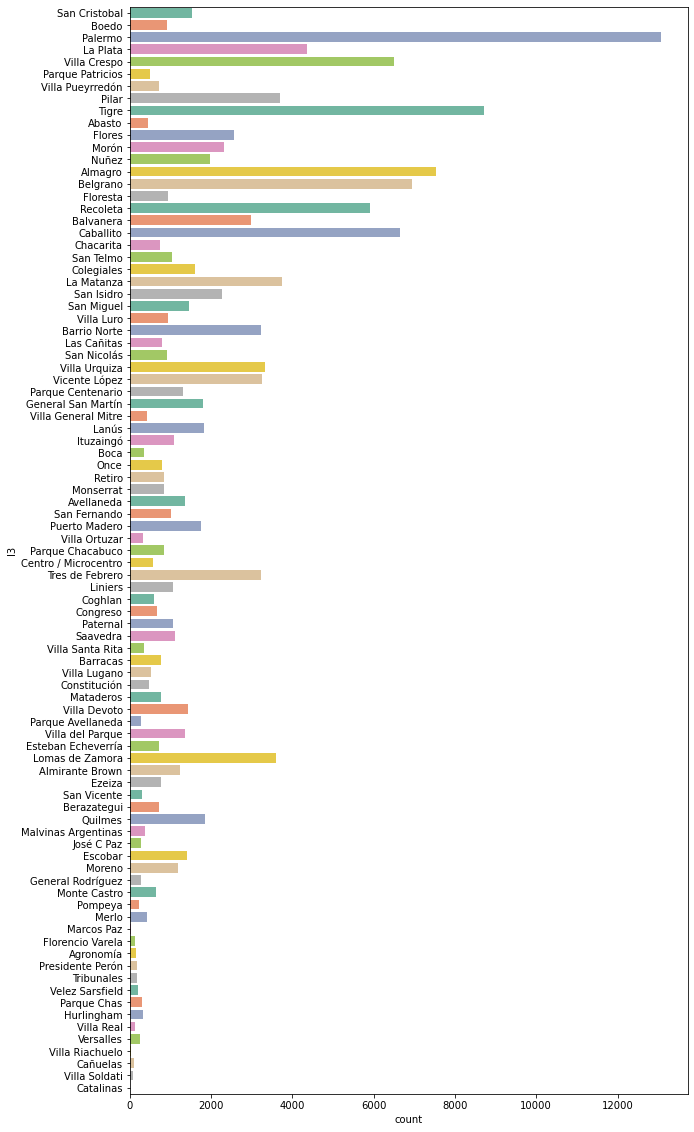

In [12]:
plt.figure(figsize=(10, 20))
sns.countplot(data = properati, y = 'l3', palette = "Set2")

Principales localidades de las publicaciones de los inmuebles. En primer lugar tenemos palermo, con la mayor cantidad de publicaciones.

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

No handles with labels found to put in legend.


Shape: (91485, 19)


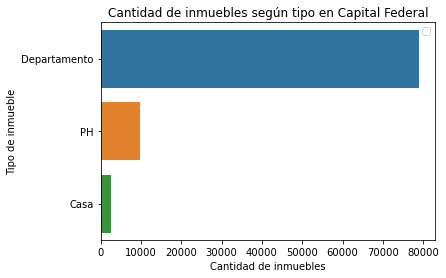

In [13]:
# Filtrado por propiedades mas abundantes de capital federal
df1 = properati[((properati['property_type']=='Departamento') | (properati['property_type']=='PH') | (properati['property_type']=='Casa')) & (properati['l2']=='Capital Federal')]
print('Shape:',df1.shape)
sns.countplot(data = df1, y = 'property_type')
plt.xlabel('Cantidad de inmuebles')
plt.ylabel('Tipo de inmueble')
plt.title('Cantidad de inmuebles según tipo en Capital Federal')
plt.legend()

Gráfico que muestra las 3 propiedades con las que vamos a trabajar despues de realizar un primer filtrado.

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [14]:
#Distribución y relaciones de a pares.
df1.corr()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,-0.063281,0.002065,-0.009273,0.097078,-0.002239,0.000296,0.171693
lon,-0.063281,1.000000,0.059762,0.045443,0.079655,0.000084,0.006052,0.156230
rooms,0.002065,0.059762,1.000000,0.927300,0.603174,0.064774,0.066757,0.448318
bedrooms,-0.009273,0.045443,0.927300,1.000000,0.603968,0.064468,0.066174,0.413555
bathrooms,0.097078,0.079655,0.603174,0.603968,1.000000,0.056524,0.058192,0.587724
surface_total,-0.002239,0.000084,0.064774,0.064468,0.056524,1.000000,0.770742,0.049071
surface_covered,0.000296,0.006052,0.066757,0.066174,0.058192,0.770742,1.000000,0.054534
price,0.171693,0.156230,0.448318,0.413555,0.587724,0.049071,0.054534,1.000000


No handles with labels found to put in legend.


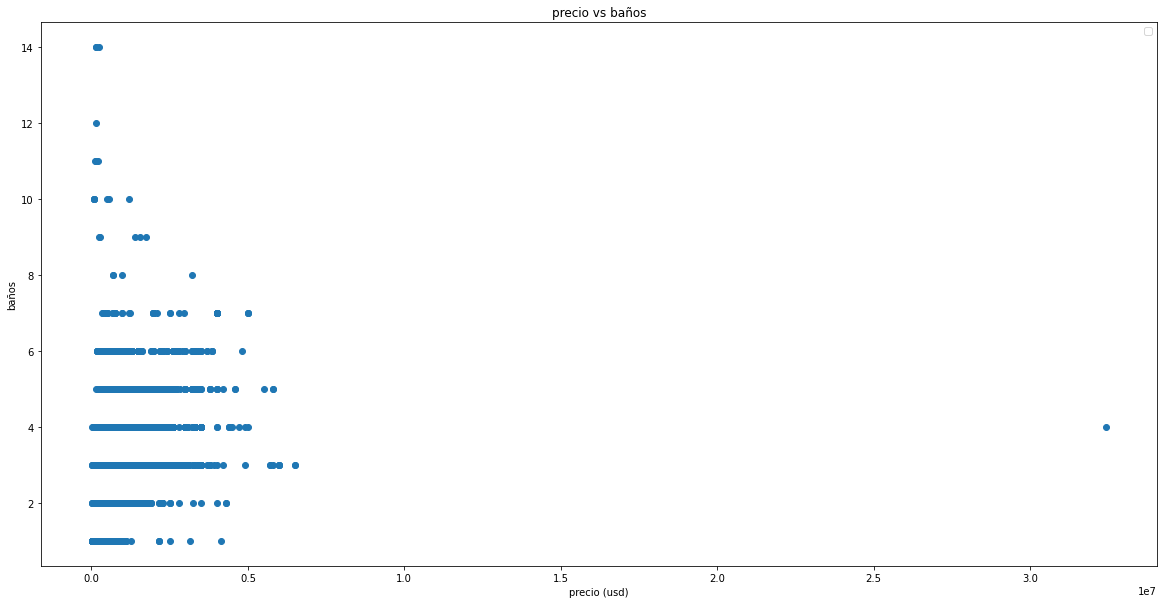

In [15]:
plt.figure(figsize = (20,10))
x = df1.price #coordenadas en x precios
y = df1.bathrooms #coordenada en y baños

plt.scatter(x,y)
plt.xlabel('precio (usd)')
plt.ylabel('baños')
plt.title('precio vs baños')
plt.legend()


Diagrama de dispeción, realación precio y cantidad de baños.

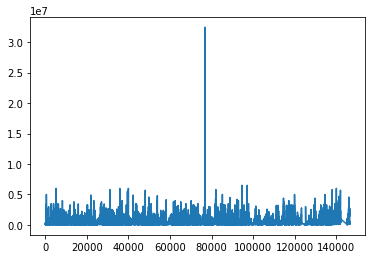

In [16]:
plt.plot(df1.price)

Podemos observar que la mayoria de los departamentos rondan o varian sus precios en menos de 500.000 dolares.

(10, 1000)

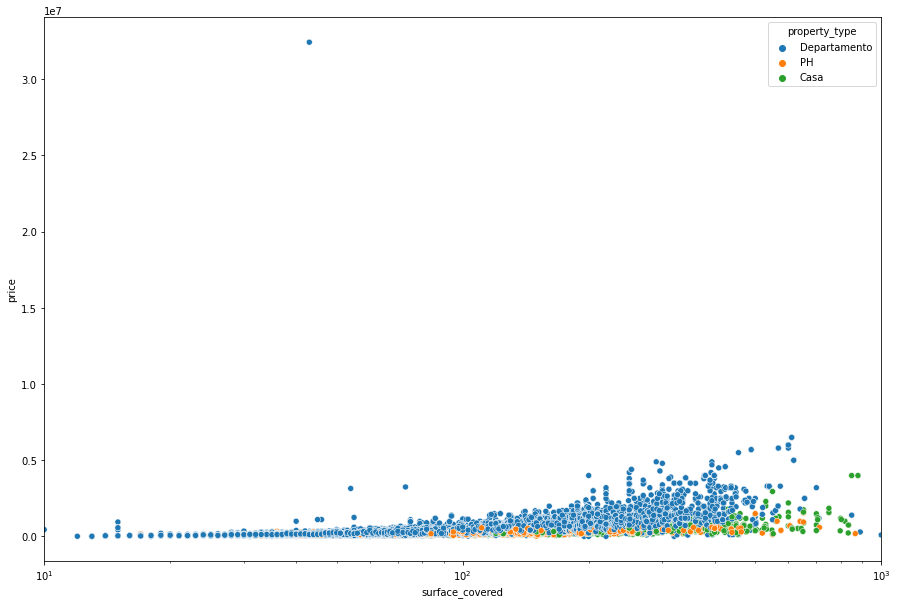

In [17]:
plt.figure(figsize = (15,10))
sns.scatterplot(data=df1, x="surface_covered", y="price", hue = 'property_type')
axes = plt.gca()
axes.set_xscale('log')
plt.xlim(10,1000)

Diagrama de disperción entre variables precio y superficie cubierta, en el mismo se utilizo una escala logaritmica en la superficie para poder mejorar la interpretación visual de la gráfica, al mismo tiempo se diferencio por tipo de propiedad.
Interpretación:
Se observa una distribución marcada en cuanto al tipo de propiedad, esto quiere decir que los precios varian mucho de una propiedad a otra en cuanto a su superficie.

(10, 1000)

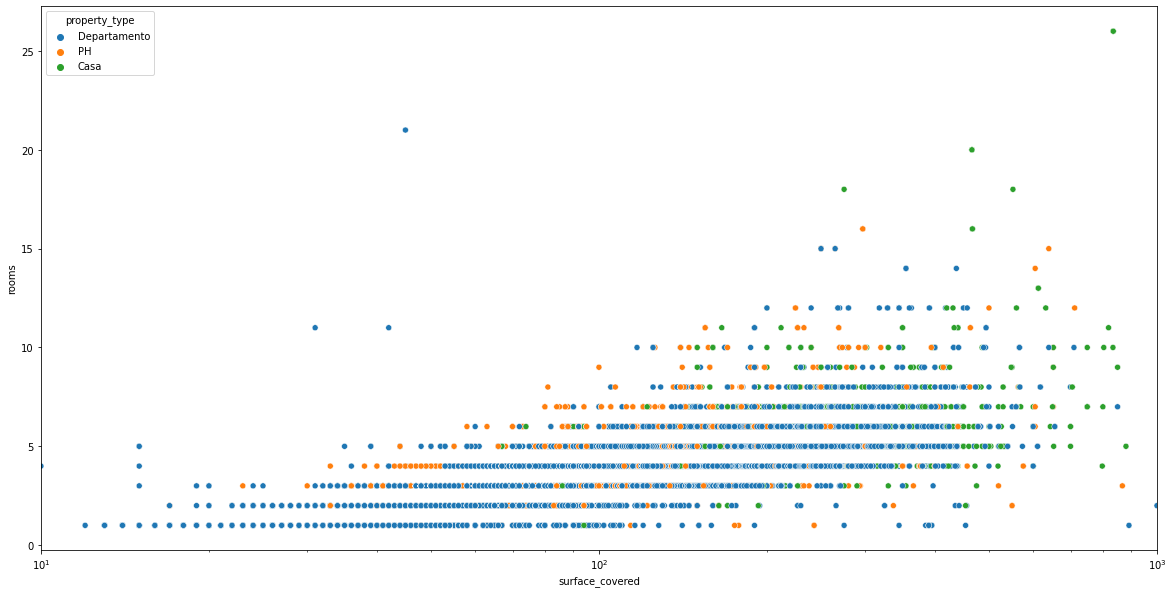

In [18]:
plt.figure(figsize = (20,10))
sns.scatterplot(data=df1, x="surface_covered", y="rooms", hue = 'property_type')
axes = plt.gca()
axes.set_xscale('log')
plt.xlim(10,1000)

Diagrama de disperción entre variables rooms y superficie cubierta, en el mismo se utilizo una escala logaritmica en la superficie para poder mejorar la interpretación visual de la gráfica, al mismo tiempo se diferencio por tipo de propiedad.
Interpretacion:
A mayor número  de rooms mayor la superficie cubierta. Deberiamos realizar un filtro para obtener mejores resultados. En el caso de las casas la superficie cubierta es mayor que los demas inmuebles.

(10, 1000)

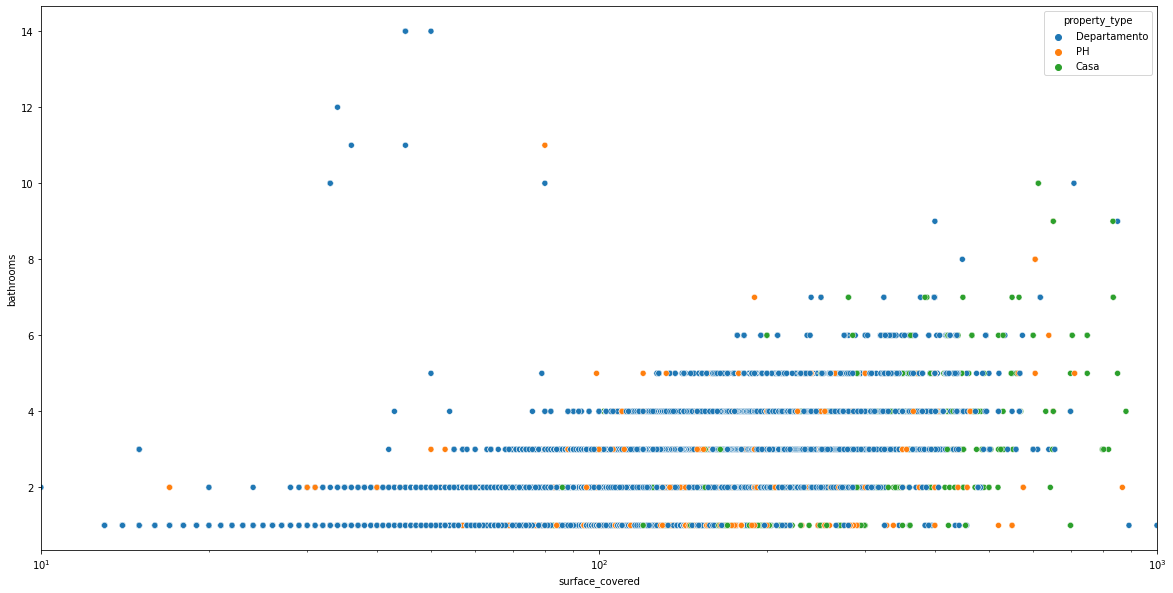

In [19]:
plt.figure(figsize = (20,10))
sns.scatterplot(data=df1, x="surface_covered", y="bathrooms", hue = 'property_type')
axes = plt.gca()
axes.set_xscale('log')
plt.xlim(10,1000)

Diagrama de disperción entre variables bathrooms y superficie cubierta, en el mismo se utilizo una escala logaritmica en la superficie para poder mejorar la interpretación visual de la gráfica, al mismo tiempo se diferencio por tipo de propiedad.
Interpretacion:
A mayor número  de bathrooms mayor la superficie cubierta. Deberiamos realizar un filtro para obtener mejores resultados. En el caso de las casas la superficie cubierta es mayor que los demas inmuebles.

In [20]:
#Lo primero que se hace es eliminar filas con valores nulos.
df1.dropna(inplace = True)
print(df1.shape)

(76961, 19)


<ipython-input-20-462d95b5a0f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace = True)


In [21]:
df1.head(1)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.60588,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta


In [22]:
#eliminamos columnas que no aportan valor.
df1.drop(['lat','lon','start_date','end_date','created_on','title','description','currency','l1','l2','l3','operation_type'],axis=1, inplace=True)


/Users/feliorelo/opt/anaconda3/envs/acamica/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
df1.head(1)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento


In [24]:
#Separamos inmuebles por estilos de propiedades.
depto = df1[(df1['property_type']=='Departamento')]
print(depto.shape)
ph = df1[(df1['property_type']=='PH')]
print(ph.shape)
casa = df1[(df1['property_type']=='Casa')]
print(casa.shape)

(65485, 7)
(9352, 7)
(2124, 7)


<AxesSubplot:ylabel='surface_total'>

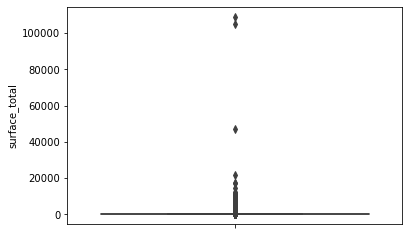

In [25]:
#Comenzamos filtrando deptos que son la cantidad mas abundandte
sns.boxplot(data = depto, y = "surface_total")

Boxplot de superficie total. El mismo no es valido para obtener una interpretación, es necesario filtrar.

shape (52239, 7)


<AxesSubplot:ylabel='surface_total'>

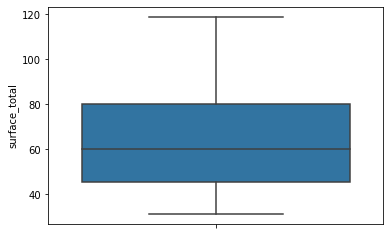

In [26]:
#depto1 Filtro para separar propiedades menores a 120m2 y mayores a 30, y superficie cubierta menor a 2000
depto1 = depto[(depto['surface_total']<120) & (depto['surface_total']>30) & (depto['surface_covered']<2000)]
print('shape', depto1.shape)
sns.boxplot(data = depto1, y = "surface_total")

En este boxplot podemos observar que el 25% de los valores de superficie total son menores a 45m2, el 50% de los valores menores a 60m2 y el 75% de los valores son menores o iguales a 80m2.

/Users/feliorelo/opt/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/feliorelo/opt/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/feliorelo/opt/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/feliorelo/opt/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/feliorelo/opt/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


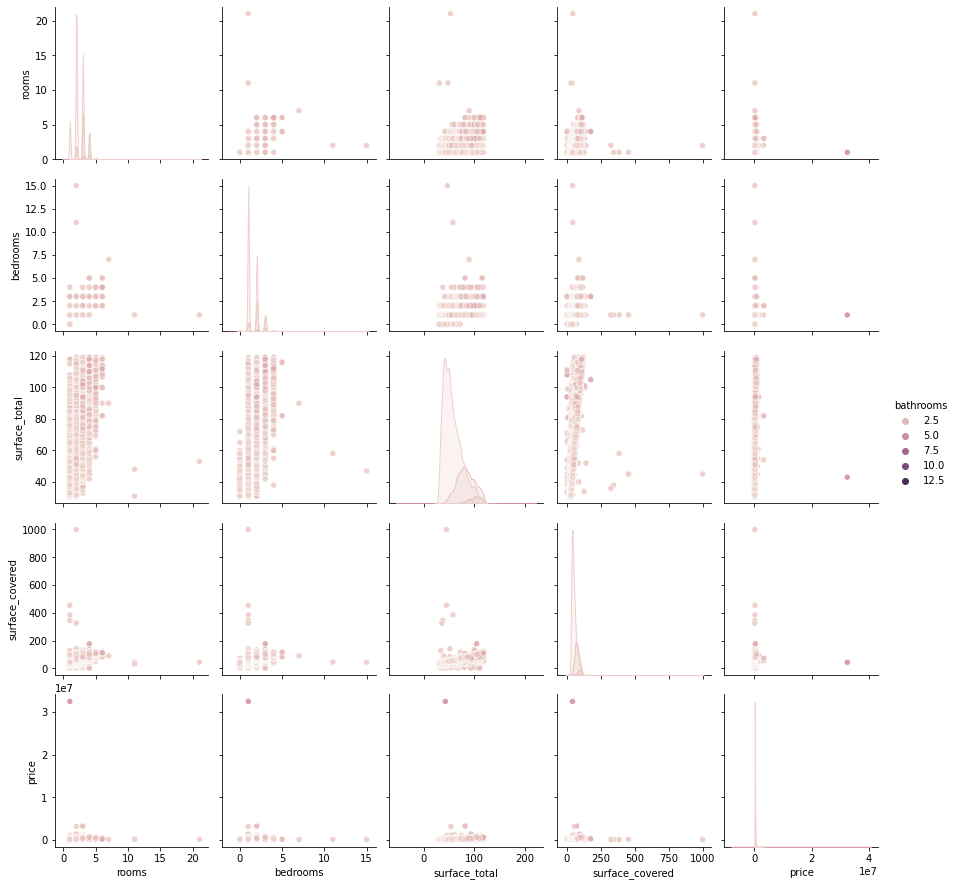

In [27]:
sns.pairplot(depto1, hue = 'bathrooms')

In [28]:
#Se eliminaron departamentos con mas de 5 cuartos y 3 baños
depto2 = depto1[(depto1['rooms']<6) & (depto1['bathrooms']<4)]
depto2.shape

(52160, 7)

<AxesSubplot:ylabel='price'>

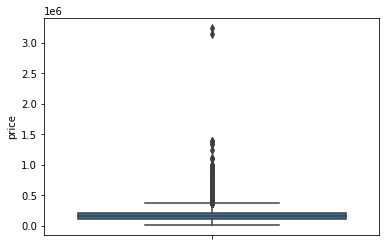

In [29]:
sns.boxplot(data = depto2, y = "price")

En este caso tampoco podemos obtener mucha información de este boxplot, es necesario filtrar.

Shape filtro depto3:  (42936, 7)
Shape filtro depto4:  (29773, 7)


<AxesSubplot:xlabel='surface_covered', ylabel='price'>

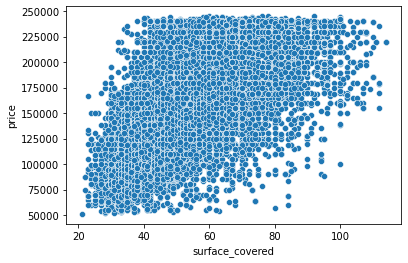

In [30]:
# Se eliminaron departamentos con valores mayores a $245000 y menores a $60000 dolares
depto3 = depto2[(depto2['price']<245000) & (depto2['price']>50000)]
print("Shape filtro depto3: ",depto3.shape)
#Filtrado de datos en donde surface_covered > a surface_total.
depto4 = depto3[(depto3['surface_covered'] < depto3['surface_total']) & (depto3['surface_covered']>20)]
print("Shape filtro depto4: ",depto4.shape)
sns.scatterplot(x="surface_covered", y="price", data=depto4)

Diagrama de disperción precio vs superficie cubierta.

<AxesSubplot:ylabel='price'>

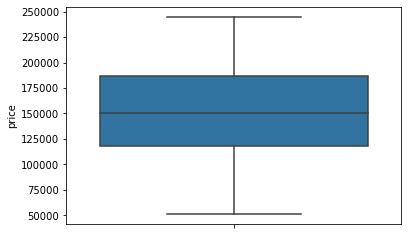

In [31]:
sns.boxplot(data = depto4, y = "price")

En este boxplot podemos observar que el 25% de los departamentos tienen su precio menor a 125.000 dolares, el 50% de los valores menores a 150.000 dolares y el 75% de los valores son menores o iguales a 185.000 dolares.

In [32]:
depto4['bedrooms'].value_counts()

1.0     16392
2.0     10204
3.0      2752
0.0       242
4.0       181
15.0        1
11.0        1
Name: bedrooms, dtype: int64

In [33]:
#Filtro departamentos mayores a 6 habitaciones
depto5 = depto4[depto4['bedrooms']<6]
print("shape depto5: ",depto5.shape)


shape depto5:  (29771, 7)


No handles with labels found to put in legend.


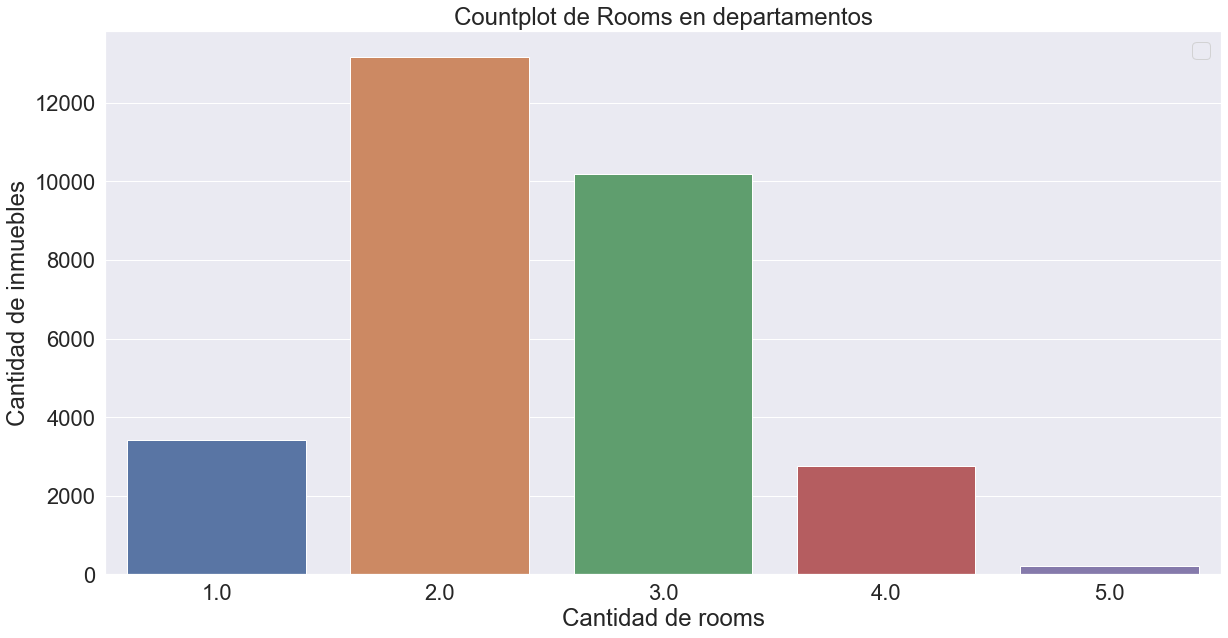

In [34]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=2)
sns.countplot(data = depto5, x = 'rooms')
plt.xlabel('Cantidad de rooms')
plt.ylabel('Cantidad de inmuebles')
plt.title('Countplot de Rooms en departamentos')
plt.legend()


En la gráfica de arriba podemos observar que la mayoria de los departamentos del dataset tienen entre 2 y 3 rooms, luego en una menor proporción encontramos inmuebles con 4 y 1 rooms y por último una pequeña porción de inmuebles con 5 rooms.

No handles with labels found to put in legend.


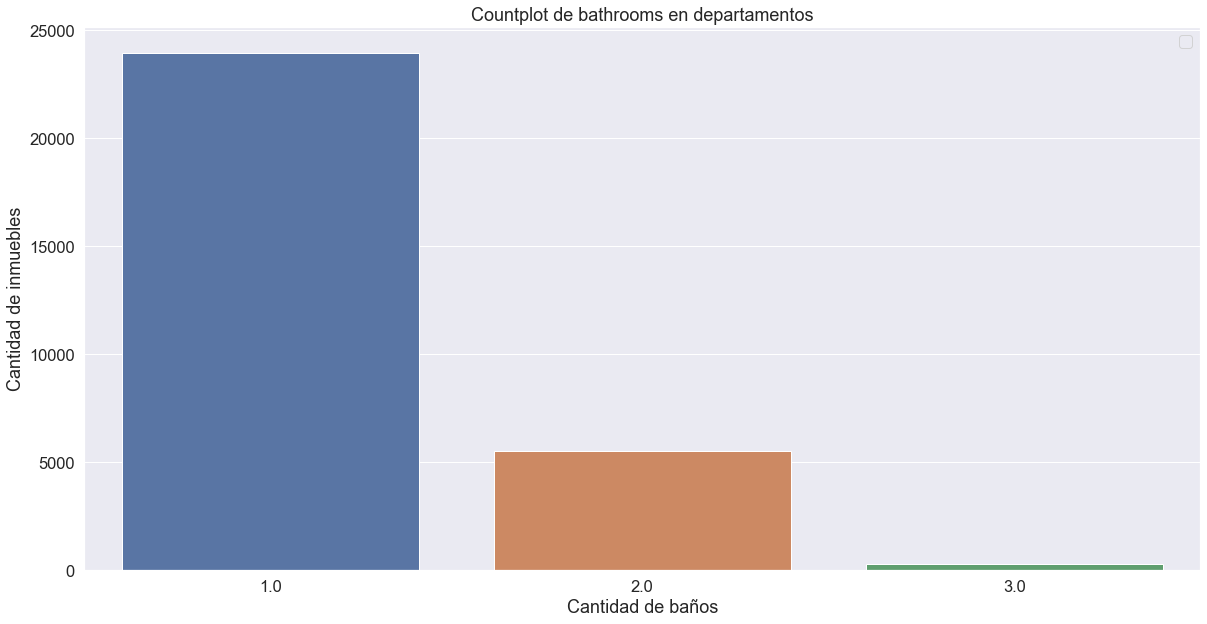

In [35]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5)
sns.countplot(data = depto5, x = 'bathrooms')
plt.xlabel('Cantidad de baños')
plt.ylabel('Cantidad de inmuebles')
plt.title('Countplot de bathrooms en departamentos')
plt.legend()

En la gráfica de arriba podemos observar que la mayoria de los departamentos tienen 1 baño, luego hay una menor proporción que tiene 2 baños y una porción muy pequeña de 3 baños.

<Figure size 1440x1440 with 0 Axes>

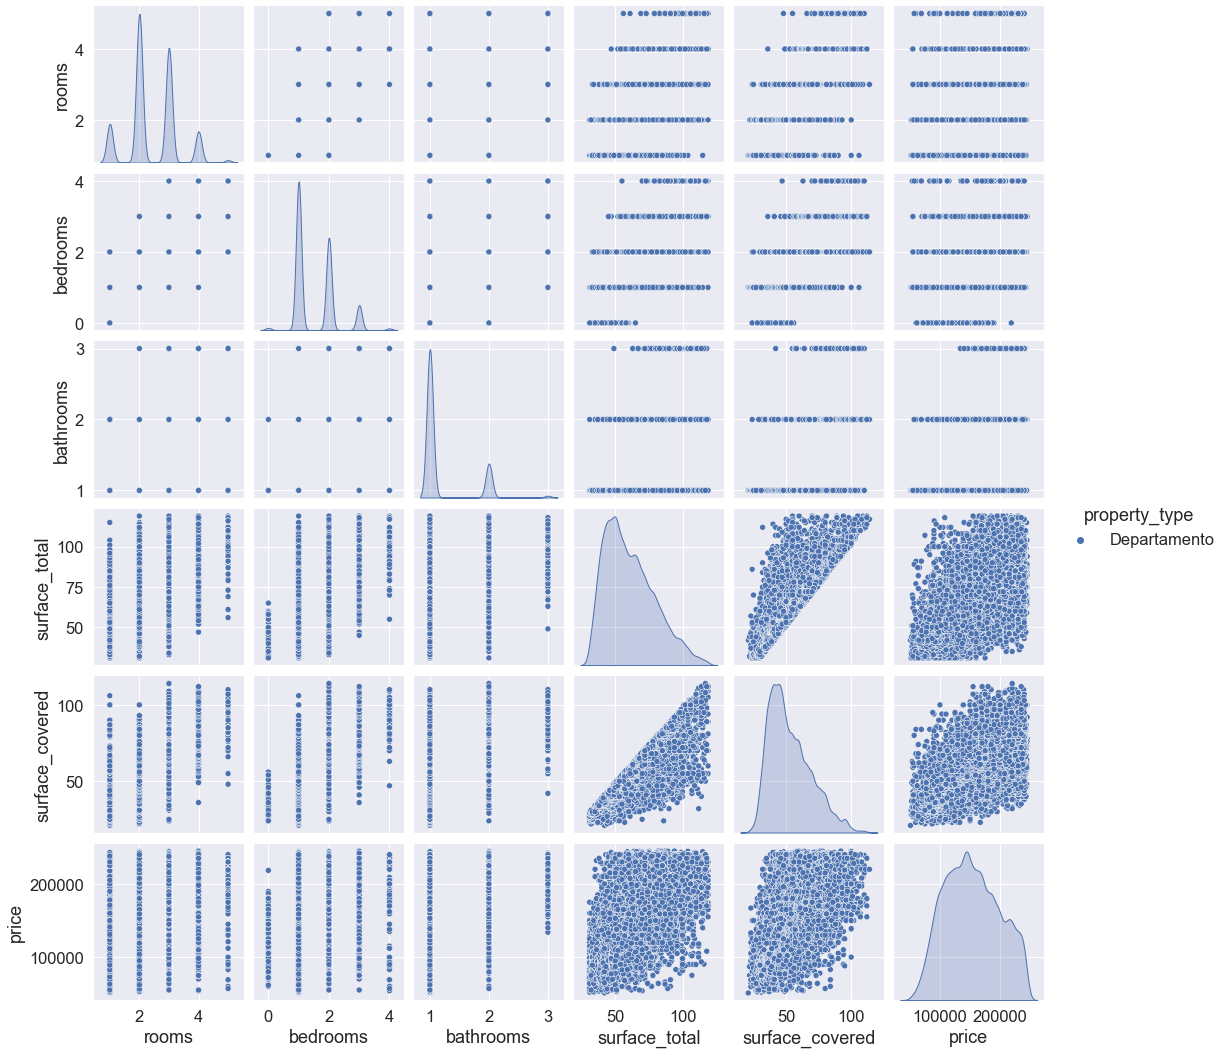

In [36]:
plt.figure(figsize = (20,20))
sns.pairplot(depto5, hue = 'property_type')

**Conclusión de filtros en Departamentos:

Lo primero que hice fue dividir el dataframe de datos de inmuebles de CAPITAL FEDERAL en los 3 tipos de propiedad mas abundantes como son Ph,Deptos y casas con el fin de poder analizarlos de una mejor manera a cada uno y hacer un filtrado correcto.
En este caso comence filtrando los departamentos, los filtros que utilice fueron los siguientes,(antes de comenzar con el filtrado mi shape era el siguiente (65485, 7)):

-Departamentos entre 120m2 y 30m2 (shape (52239, 7)).

-Elimine departamentos que tenian más de 5 rooms y más de 3 bathrooms(Shape (52160, 7)).

-Filtre rango de precios entre 245.000 dolares y 50.000 dolares(Shape (42936, 7).

-Elimine datos mal cargados que contenian sup. cubiertas > sup. total, esto provoco la eliminación de una gran cantidad de datos, es por eso que la etapa del cargado de datos es muy importante por que si los tenemos mal cargados despues no podemos usarlos. Ademas elimine departamentos muy pequeños menores a 20m2. (Shape (29773, 7)

-Por último elimine departamentos con mas de 6 'rooms', ya que no habian una gran cantidad de datos relevantes, solo 2 departamentos. shape final depto5:  (29771, 7)

Todo el trabajo de filtrado lo realice sabiendo que provocaria un sesgo a la hora de predecir departamentos que se encuentren por fuera de estos filtros, es por eso que el modelo realizado sirve solo para cotizar departamentos de caracteristicas similares, es decir un segmento de la población a analizar, en este caso determinados departamentos.**


In [37]:
#Filtrado de casas.
casa = df1[(df1['property_type']=='Casa')]
print('Shape casa: ',casa.shape)

Shape casa:  (2124, 7)


In [38]:
#Filtrado de datos en donde surface_covered > a surface_total.
casa1 = casa[(casa['surface_covered'] < casa['surface_total'])]
print("Shape filtro casa1: ",casa1.shape)


Shape filtro casa1:  (1645, 7)


<AxesSubplot:xlabel='surface_total', ylabel='price'>

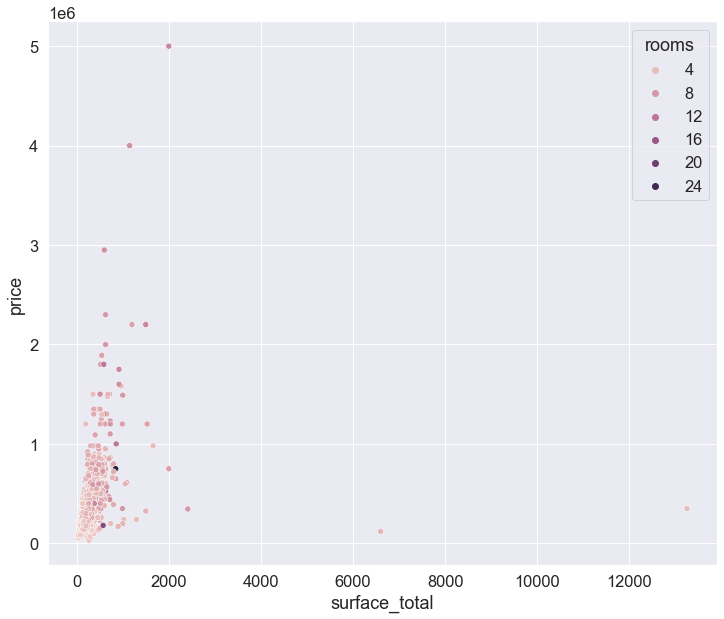

In [39]:
plt.figure(figsize = (12,10))
sns.scatterplot(x="surface_total", y="price", hue="rooms" , data=casa1)

En un primer gráfico de disperción realizado entre la variable PreciovsSuperficie_total, observamos que es necesario filtrar para obtener una mejor información ya que los datos se encuentran muy dispersos.

In [40]:
#casa2 Filtro para separar propiedades menores a 600m2 y mayores a 30
casa2 = casa1[(casa1['surface_total']<600) & (casa1['surface_total']>30)]
print("Shape filtro casa2: ",casa2.shape)

Shape filtro casa2:  (1575, 7)


<AxesSubplot:xlabel='surface_total', ylabel='price'>

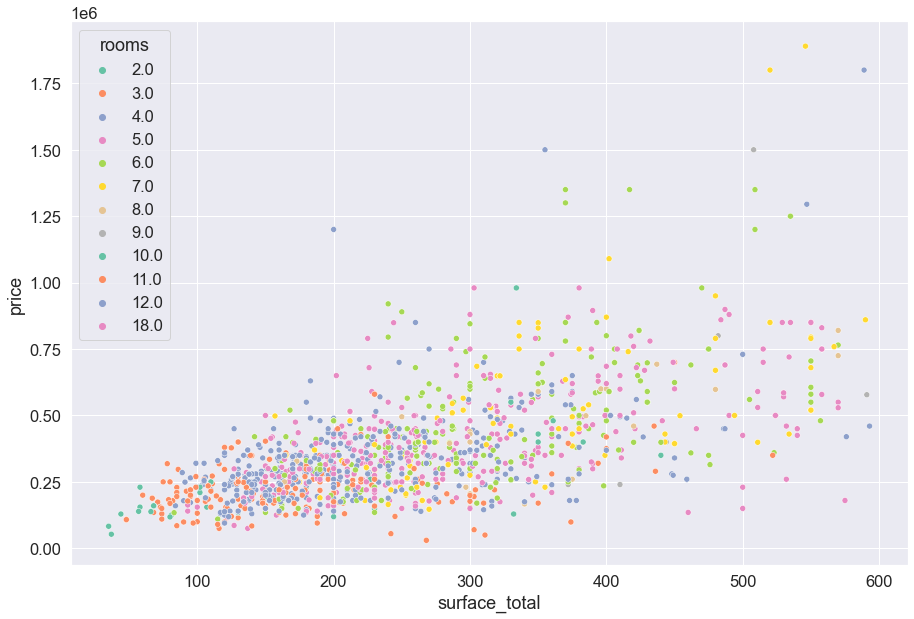

In [41]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x="surface_total", y="price", hue="rooms" ,palette = "Set2", data=casa2)

Una vez filtrado el gráfico de disperción entre la variable PreciovsSuperficie_total podemos obtener una visualización mejor, además se logro diferenciar la disperción de los datos diferenciando la cantidad de rooms, notando que a medida que aumentan los rooms aumenta la superficie total.

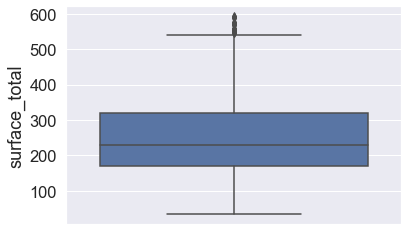

In [42]:
sns.boxplot(data = casa2, y = "surface_total")
sns.set(font_scale=1)

En este boxplot de las casas podemos observar que el 25% de los valores de superficie total son menores a 180m2, el 50% de los valores menores 240m2 y el 75% de los valores son menores o iguales a 310m2.

In [43]:
print(casa2['bathrooms'].value_counts())
print(casa2['bedrooms'].value_counts())
print(casa2['rooms'].value_counts())

2.0    715
3.0    368
1.0    364
4.0    103
5.0     18
6.0      4
7.0      3
Name: bathrooms, dtype: int64
3.0     698
4.0     411
2.0     266
5.0     115
6.0      41
1.0      25
7.0      12
8.0       4
10.0      1
9.0       1
11.0      1
Name: bedrooms, dtype: int64
4.0     511
5.0     405
6.0     264
3.0     216
7.0      99
8.0      28
2.0      26
10.0     12
9.0       6
11.0      5
12.0      2
18.0      1
Name: rooms, dtype: int64


In [44]:
casa3 = casa2[(casa2['rooms']<11)]
casa4 = casa3[(casa3['bedrooms']<8)]
casa5 = casa4[(casa4['bathrooms']<6)]
print("Shape filtro casa5: ",casa5.shape)

Shape filtro casa5:  (1557, 7)


<AxesSubplot:ylabel='price'>

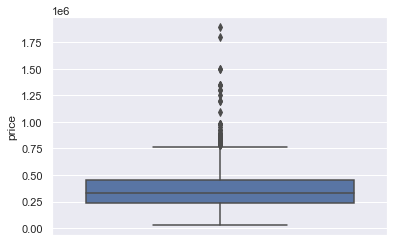

In [45]:
sns.boxplot(data = casa5, y = "price")

En este boxplot de las casas podemos observar que el 25% de los valores de precios son menores a 250000 dolares, el 50% de los valores menores 350000 dolares y el 75% de los valores son menores o iguales a 500000 dolares.

Shape filtro casa6:  (1467, 7)


<AxesSubplot:ylabel='price'>

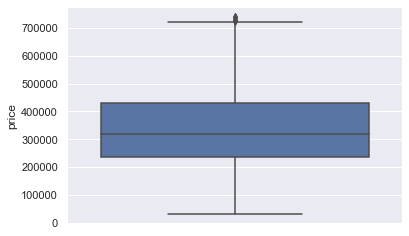

In [46]:
casa6 = casa5[(casa5['price']<750000)]
print("Shape filtro casa6: ",casa6.shape)
sns.boxplot(data = casa6, y = "price")

Se filtro nuevamente las casas, para obtener un boxplot mas detallado y poder ver con mas información en donde se encuentra el rango de precios de casas una vez aplicado los filtros.

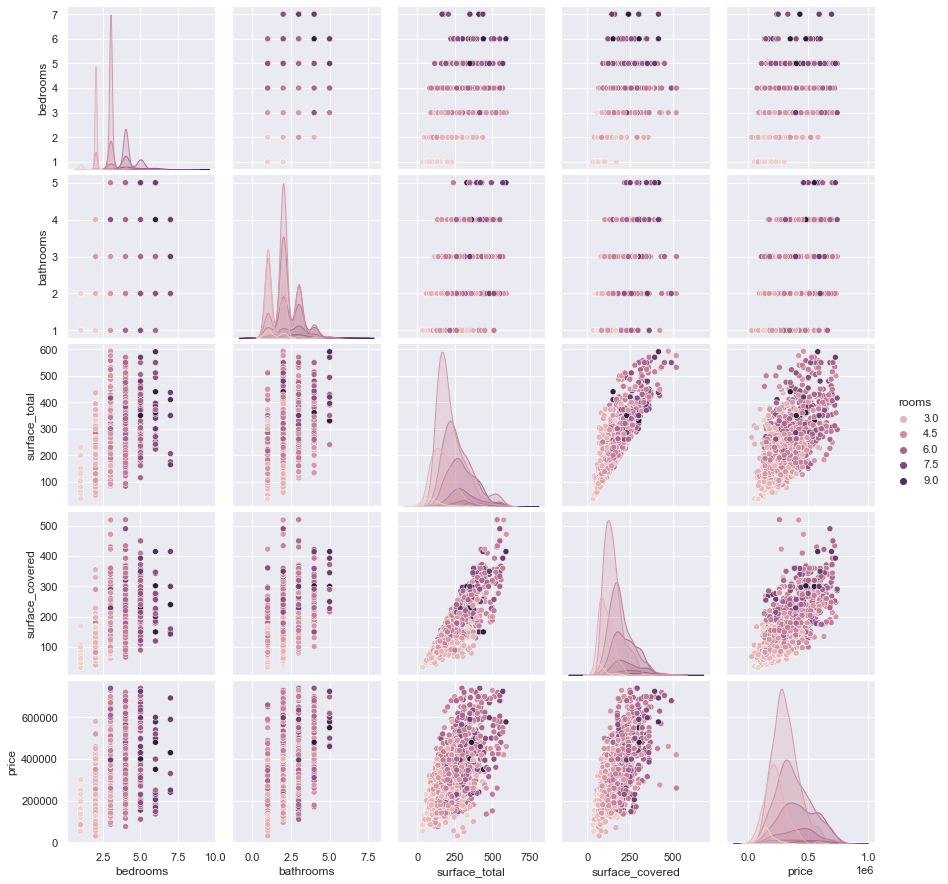

In [47]:
sns.pairplot(data=casa6, hue = 'rooms')

**Conclusión de filtros en Casas:

Al igual que en los departamentos realice filtrados para las casas con el fin de limpiar datos que no considere irrelevantes. 

Los filtros que utilice fueron los siguientes,(antes de comenzar con el filtrado mi shape era el siguiente Shape casa:  (2124, 7):

-Comence eliminando casas con sup_total < Sup_cubierta (Shape(1645, 7)).

-Filtre para separar propiedades menores a 600m2 y mayores a 30.(Shape(1575, 7)

-Casas menores a $750.000 (Shape(1467, 7))
**

In [48]:
#Filtrado de PH
print('Shape ph: ',ph.shape)

Shape ph:  (9352, 7)


In [49]:
#Elimino Sup cub > sup.total, por lo visto no hay ninguna
ph1 = ph[(ph['surface_covered'] < ph['surface_total'])]
print('Shape ph1: ',ph.shape)

Shape ph1:  (9352, 7)


<AxesSubplot:xlabel='surface_covered', ylabel='price'>

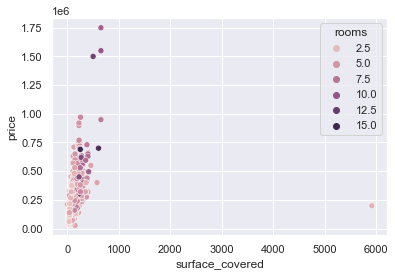

In [50]:
sns.scatterplot(x="surface_covered", y="price", hue="rooms" , data=ph1)

Observamos el diagrama de disperción para los pH en este caso comparando las variables precio y superficie cubierta. Tal como observamos la gran dispersión de los datos hacen necesario aplicar un filtro

Shape ph2:  (5594, 7)


<AxesSubplot:xlabel='surface_covered', ylabel='price'>

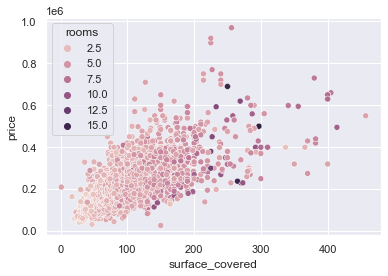

In [51]:
#filtro sup_cubierta < 500
ph2 = ph1[(ph1['surface_covered']<500)]
print('Shape ph2: ',ph2.shape)
sns.scatterplot(x="surface_covered", y="price", hue="rooms" , data=ph2)

Se aplica un filtro para unidades con superficie cubierta menor a 500m2, de esta manera podemos observar de manera detallada la dispersión de los datos.

<AxesSubplot:ylabel='surface_total'>

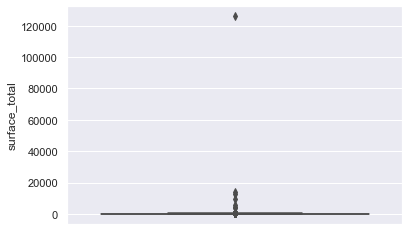

In [52]:
sns.boxplot(data = ph2, y = "surface_total")

Diagrama de cajas que no permite observar en detalle el rango de superficie total para Ph, hace necesario aplicar un filtro para realizar una limpieza de los datos.

Shape ph3:  (5119, 7)


<AxesSubplot:ylabel='surface_total'>

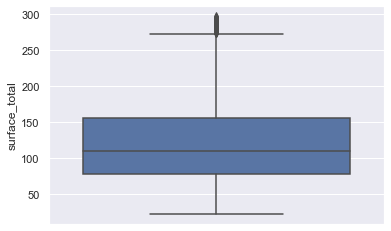

In [53]:
ph3 = ph2[(ph2['surface_total']<300)]
print('Shape ph3: ',ph3.shape)
sns.boxplot(data = ph3, y = "surface_total")

En este caso podemos observar que la media se encuentra en 110m2 para los pH, con un rango intercuartilico entre 150m2 y 80m2.

<AxesSubplot:ylabel='price'>

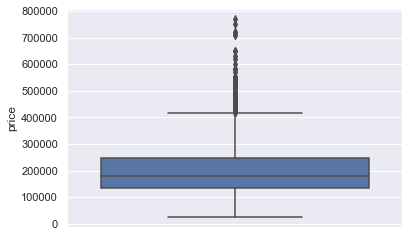

In [54]:
#filtro rango de precios
sns.boxplot(data = ph3, y = "price")

Se observa en el boxplot valores atípicos por encima del diagrama de cajas, el cual hace necesario aplicar un filtro para limpieza de datos.

Shape ph3:  (5083, 7)


<AxesSubplot:ylabel='price'>

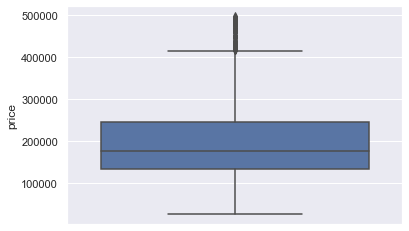

In [55]:
ph4 = ph3[(ph3['price']<500000)]
print('Shape ph3: ',ph4.shape)
sns.boxplot(data = ph4, y = "price")

Una vez aplicado el filtro sobre los precios de ph, podemos observar que la media se encuentra entre los 180000 dolares aproximadamente.

In [56]:
print(ph4['bathrooms'].value_counts())
print(ph4['bedrooms'].value_counts())
print(ph4['rooms'].value_counts())

1.0     3113
2.0     1612
3.0      296
4.0       50
5.0       10
11.0       1
7.0        1
Name: bathrooms, dtype: int64
2.0     2199
3.0     1438
1.0      937
4.0      421
5.0       58
6.0       21
9.0        5
13.0       1
7.0        1
8.0        1
0.0        1
Name: bedrooms, dtype: int64
3.0     2034
4.0     1406
2.0      845
5.0      523
6.0      148
1.0       57
7.0       45
8.0       15
9.0        7
10.0       2
15.0       1
Name: rooms, dtype: int64


In [57]:
ph5 = ph4[(ph4['rooms']<11)]
ph6 = ph5[(ph5['bedrooms']<8)]
ph7 = ph6[(ph6['bathrooms']<6)]
print("Shape filtro casa5: ",ph7.shape)

Shape filtro casa5:  (5074, 7)


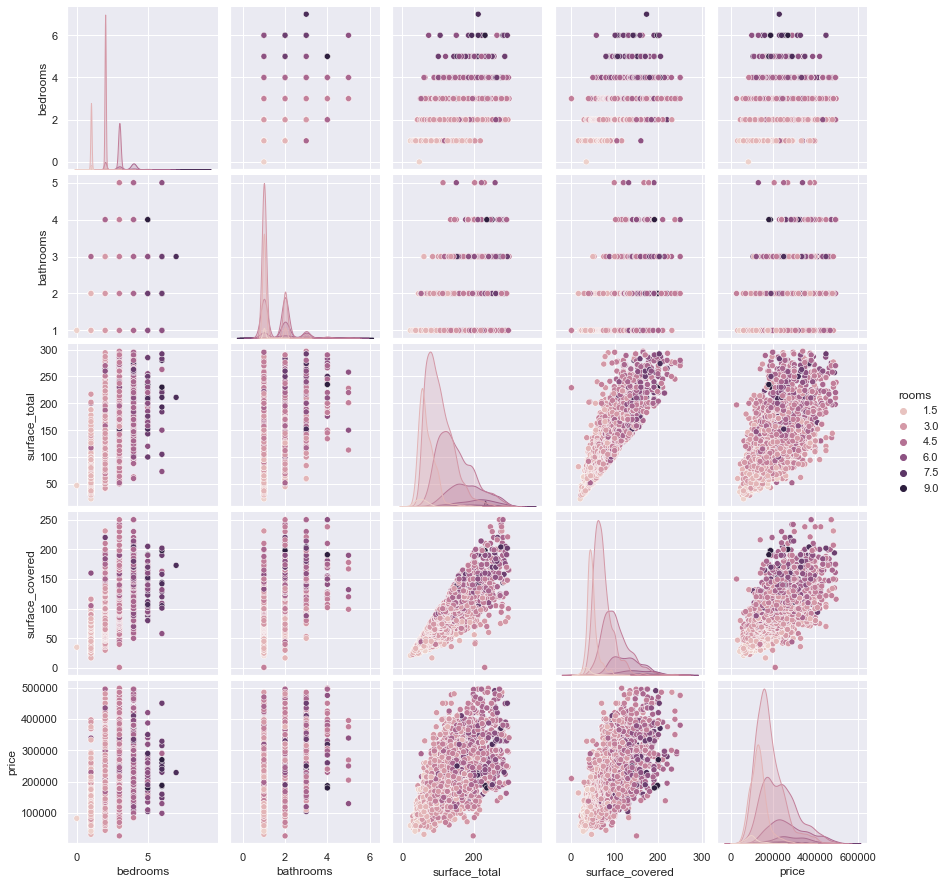

In [58]:
sns.pairplot(ph7, hue = 'rooms')

**Conclusión de filtros en PH:
    
Comence con un shape de : (9352, 7):
        
-Comence eliminando PH con sup_total < Sup_cubierta (Shape(9352, 7)).

-Sup. Cubierta < 500m2 (Shape(5594, 7))

-Sup_total < 300m2 ((Shape(5119, 7)))

-Precio < $500.000 ((Shape(5083, 7)))

-Filtro menor a 11 rooms, 8 bedrooms y menores a 6 baños
**Shape final(5074, 7)

In [59]:
print(ph7.shape, casa6.shape, depto5.shape)

(5074, 7) (1467, 7) (29771, 7)


In [60]:
df = ph7.append(casa6)

In [61]:
df1 = df.append(depto5)

In [62]:
df1.shape

(36312, 7)

In [63]:
df1.reset_index(drop=True)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,2.0,1.0,2.0,70.0,58.0,159000.0,PH
1,2.0,1.0,1.0,85.0,50.0,295000.0,PH
2,1.0,1.0,1.0,45.0,37.0,89000.0,PH
3,1.0,1.0,1.0,45.0,37.0,89000.0,PH
4,2.0,1.0,2.0,66.0,49.0,170000.0,PH
...,...,...,...,...,...,...,...
36307,3.0,2.0,2.0,72.0,67.0,199999.0,Departamento
36308,3.0,2.0,2.0,77.0,68.0,237677.0,Departamento
36309,3.0,2.0,1.0,72.0,70.0,205000.0,Departamento
36310,4.0,3.0,2.0,83.0,80.0,215000.0,Departamento


El DF1 obtenido al unir los 3 dataframe filtrados por tipos de propiedad(Casa+Departamento+Ph), es el que deberiamos utilizar para realizar una predicción. Este modelo obtenido deberia utilizarse para predecir precios de inmuebles que cumplan con las condiciones establecidas en cada conclusión por tipo de propiedad. Por ejemplo: En el caso de Ph el mismo deberia ser una superficie total < 300m2, precio < $500.000 y con menos de 11 ambientes, 8 habitaciones y 6 baños, para ph que no cuenten con estas condiciones el modelo no funcionaria de la mejor manera ya que estaria cesgado.

(0.0, 400000.0)

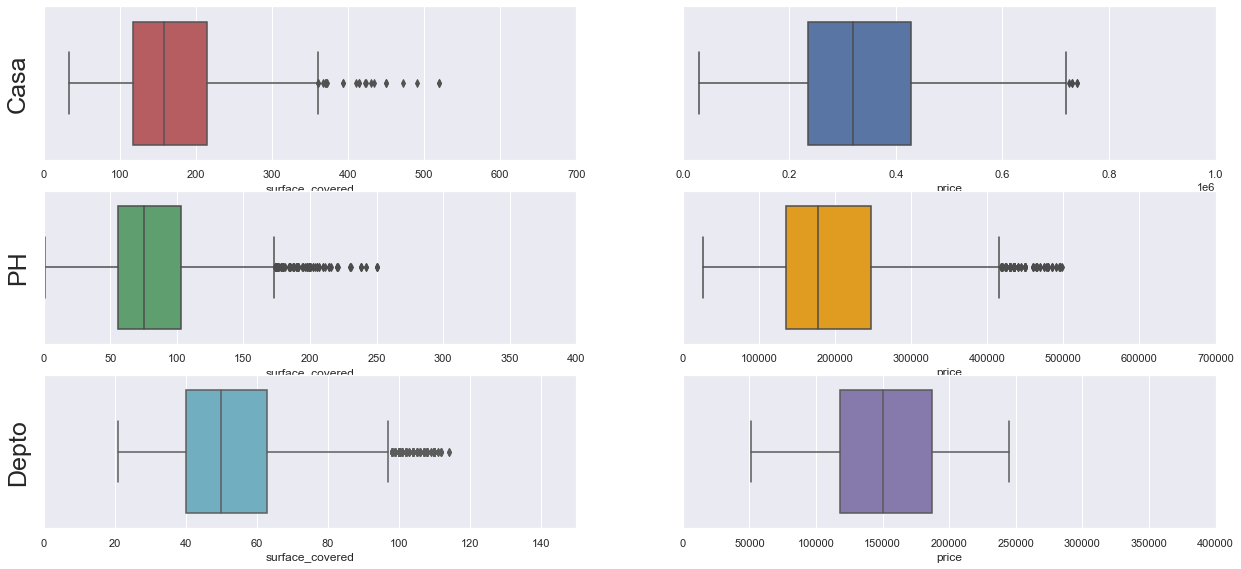

In [64]:
#ph7 casa6 depto5
plt.figure(figsize = (7*3,4.8*2))

plt.subplot(3,2,1)
sns.boxplot(data = casa6, x = 'surface_covered', color = 'r')
plt.xlim(0, 700)
plt.ylabel('Casa', size = 25)

plt.subplot(3,2,2)
sns.boxplot(data = casa6, x = 'price')
plt.xlim(0, 1000000)

plt.subplot(3,2,3)
sns.boxplot(data = ph7, x = 'surface_covered', color = 'g')
plt.xlim(0, 400)
plt.ylabel('PH', size = 25)

plt.subplot(3,2,4)
sns.boxplot(data = ph7, x = 'price', color = 'orange')
plt.xlim(0, 700000)

plt.subplot(3,2,5)
sns.boxplot(data = depto5, x = 'surface_covered', color = 'c')
plt.xlim(0, 150)
plt.ylabel('Depto', size = 25)

plt.subplot(3,2,6)
sns.boxplot(data = depto5, x = 'price', color = 'm')
plt.xlim(0, 400000)


Una vez filtrado los datos de nuestro dataset, podemos concluir lo siguiente:

-Las principales Casas de nuestro modelo tienen: 
    Superficie cubierta entre 100 y 220m2
    Precio entre 200.000 y 420000 dolares.
  
-Los principales Ph de nuestro modelo tienen: 
    Superficie cubierta entre 50 y 110m2
    Precio entre 130.000 y 240000 dolares.
    
-Los principales Deptos de nuestro modelo tienen: 
    Superficie cubierta entre 40 y 65m2
    Precio entre 110.000 y 190.000 dolares.

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [65]:
#Primero compararemos las correlaciones de los dataframe iniciales vs los filtrados
#ph7 vs ph, casa6 vs casa y depto 5 vs depto
ph.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.932279,0.577701,0.042306,0.037278,0.594401
bedrooms,0.932279,1.000000,0.572452,0.045093,0.038741,0.579511
bathrooms,0.577701,0.572452,1.000000,0.052221,0.045259,0.593037
surface_total,0.042306,0.045093,0.052221,1.000000,0.810876,0.027541
surface_covered,0.037278,0.038741,0.045259,0.810876,1.000000,0.023752
price,0.594401,0.579511,0.593037,0.027541,0.023752,1.000000


In [66]:
ph7.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.904438,0.501188,0.674214,0.724329,0.518038
bedrooms,0.904438,1.000000,0.482042,0.649617,0.691432,0.495756
bathrooms,0.501188,0.482042,1.000000,0.494521,0.592526,0.549554
surface_total,0.674214,0.649617,0.494521,1.000000,0.865017,0.669726
surface_covered,0.724329,0.691432,0.592526,0.865017,1.000000,0.696554
price,0.518038,0.495756,0.549554,0.669726,0.696554,1.000000


In [67]:
casa.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.867850,0.547423,0.195146,0.161947,0.382247
bedrooms,0.867850,1.000000,0.572230,0.195368,0.162733,0.345395
bathrooms,0.547423,0.572230,1.000000,0.229207,0.181335,0.530511
surface_total,0.195146,0.195368,0.229207,1.000000,0.110336,0.276203
surface_covered,0.161947,0.162733,0.181335,0.110336,1.000000,0.213764
price,0.382247,0.345395,0.530511,0.276203,0.213764,1.000000


In [68]:
casa6.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.819716,0.447549,0.483296,0.552635,0.427495
bedrooms,0.819716,1.000000,0.465440,0.491630,0.546153,0.401874
bathrooms,0.447549,0.465440,1.000000,0.458867,0.531255,0.508586
surface_total,0.483296,0.491630,0.458867,1.000000,0.862178,0.602372
surface_covered,0.552635,0.546153,0.531255,0.862178,1.000000,0.666977
price,0.427495,0.401874,0.508586,0.602372,0.666977,1.000000


In [69]:
depto.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.921876,0.610379,0.069192,0.080996,0.471560
bedrooms,0.921876,1.000000,0.617921,0.066032,0.078726,0.433261
bathrooms,0.610379,0.617921,1.000000,0.060426,0.068625,0.595498
surface_total,0.069192,0.066032,0.060426,1.000000,0.711456,0.067026
surface_covered,0.080996,0.078726,0.068625,0.711456,1.000000,0.079018
price,0.471560,0.433261,0.595498,0.067026,0.079018,1.000000


In [70]:
depto5.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.923465,0.410720,0.730673,0.798495,0.509764
bedrooms,0.923465,1.000000,0.417673,0.712964,0.787226,0.471786
bathrooms,0.410720,0.417673,1.000000,0.476268,0.503919,0.421965
surface_total,0.730673,0.712964,0.476268,1.000000,0.912901,0.649441
surface_covered,0.798495,0.787226,0.503919,0.912901,1.000000,0.656018
price,0.509764,0.471786,0.421965,0.649441,0.656018,1.000000


Podemos concluir que la mayor correlación en los 3 tipos de inmuebles se encuentra entre la superficie cubierta vs precio.

In [71]:
#Lo mismo observamos en el dataframe obtenido al unir las 3 unidades, la mayor correlación existe en la 
#superficie cubierta y el precio.
df1.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.932801,0.529703,0.704953,0.754554,0.615312
bedrooms,0.932801,1.000000,0.527673,0.683221,0.733546,0.584527
bathrooms,0.529703,0.527673,1.000000,0.542558,0.593096,0.562610
surface_total,0.704953,0.683221,0.542558,1.000000,0.934882,0.749922
surface_covered,0.754554,0.733546,0.593096,0.934882,1.000000,0.778414
price,0.615312,0.584527,0.562610,0.749922,0.778414,1.000000


Nuevamento observamos que la correlación mas grande la encontramos entre la superficie cubierta y el precio

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


**Cúal es la relación precio x m2 de superficie cubierta? Además cuales son los barrios con las 10 unidades que tienen el mayor valor precio/m2 de sup cubierta?**

In [72]:
#Relación precio de m2 de superficie cubierta y total de las unidades. 
#$/m2cubierto. y $/m2total
suprelacion = df1

suprelacion['pricem2_supcubierta'] = suprelacion.price / suprelacion.surface_covered
suprelacion['pricem2_suptotal'] = suprelacion.price / suprelacion.surface_total


#Luego puedo saber cuales son las unidades de mayor valor por m2 cubierto. Por ejemplo las 10 primeras

mascara1 = suprelacion.sort_values('pricem2_supcubierta', ascending=False)
mascara1.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,pricem2_supcubierta,pricem2_suptotal
131428,4.0,3.0,1.0,229.0,1.0,210000.0,PH,210000.000000,917.030568
108471,4.0,3.0,1.0,229.0,1.0,210000.0,PH,210000.000000,917.030568
79664,2.0,1.0,2.0,82.0,17.0,164000.0,PH,9647.058824,2000.000000
23953,2.0,1.0,2.0,82.0,17.0,164000.0,PH,9647.058824,2000.000000
1741,3.0,2.0,2.0,136.0,36.0,329000.0,PH,9138.888889,2419.117647


In [73]:
mascara2 = mascara1.iloc[2:11].reset_index(drop=True)
mascara2

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,pricem2_supcubierta,pricem2_suptotal
0,2.0,1.0,2.0,82.0,17.0,164000.0,PH,9647.058824,2000.000000
1,2.0,1.0,2.0,82.0,17.0,164000.0,PH,9647.058824,2000.000000
2,3.0,2.0,2.0,136.0,36.0,329000.0,PH,9138.888889,2419.117647
3,1.0,1.0,1.0,57.0,23.0,167000.0,Departamento,7260.869565,2929.824561
4,2.0,1.0,2.0,62.0,32.0,220000.0,Departamento,6875.000000,3548.387097
5,1.0,1.0,1.0,36.0,34.0,232000.0,Departamento,6823.529412,6444.444444
6,1.0,1.0,1.0,38.0,35.0,235000.0,Departamento,6714.285714,6184.210526
7,1.0,1.0,1.0,35.0,33.0,220000.0,Departamento,6666.666667,6285.714286
8,3.0,2.0,1.0,80.0,41.0,272000.0,PH,6634.146341,3400.000000


**Aclaración: Se utilizaron 9 valores ya que el primer valor obtenido es un valor nulo o erroneo(valor muy grande)**

In [74]:
#Unimos data frame para tener el nombre de los barrios
mascara3 = pd.merge(mascara2, properati, how='left', left_index=True, right_index=True)

<AxesSubplot:xlabel='l3', ylabel='pricem2_supcubierta'>

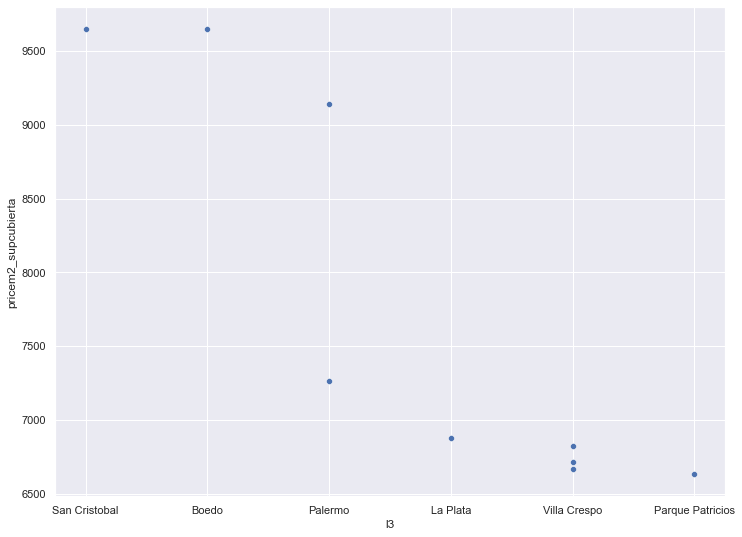

In [75]:
#Ahora podemos saber en que barrios se encuentran el top10 de inmuebles con mayor relación
#precio/superficiecubierta
plt.figure(figsize=(12,9))
sns.scatterplot(x= 'l3', y="pricem2_supcubierta" , data=mascara3)

Unidades con mayor relacion precio x m2 cubierto, además del barrio al que pertenecen.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [76]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
properati = pd.read_csv("/Users/feliorelo/Documents/ACAMICA 2020/DS_Proyecto_01_Datos_Properati.csv")
d1 = properati[((properati['property_type']=='Departamento') | (properati['property_type']=='PH') | (properati['property_type']=='Casa')) & (properati['l2']=='Capital Federal')]
d2 = d1[(d1['surface_total']<=1000) & (d1['surface_total']>=15)]
d3 = d2[(d2['price']<=4000000)]
d3.drop(['start_date','end_date','created_on','lat','lon','title','description','currency','property_type','operation_type',"l1","l2","l3"],axis=1, inplace=True)
d3.dropna(inplace = True)
d3.head(1)

/Users/feliorelo/opt/anaconda3/envs/acamica/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-76-fbbdc0741a84>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3.dropna(inplace = True)


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0


In [77]:
print(d3.shape)
d3.head(1)

(81019, 6)


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0


In [78]:
d3.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.925604,0.601887,0.725799,0.304407,0.479972
bedrooms,0.925604,1.000000,0.605002,0.695523,0.291140,0.442418
bathrooms,0.601887,0.605002,1.000000,0.651924,0.275936,0.638737
surface_total,0.725799,0.695523,0.651924,1.000000,0.375749,0.686459
surface_covered,0.304407,0.291140,0.275936,0.375749,1.000000,0.298212
price,0.479972,0.442418,0.638737,0.686459,0.298212,1.000000


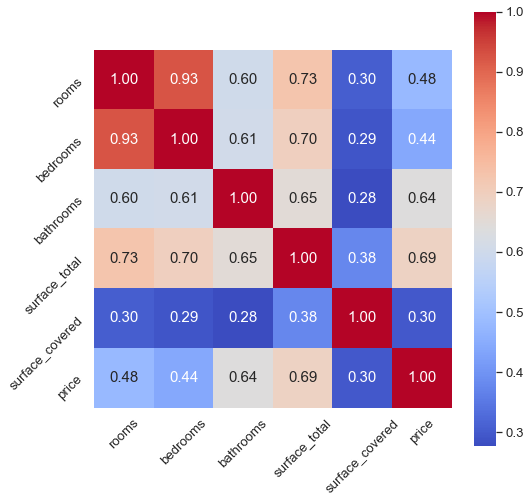

In [79]:
sns.set(font_scale=1.2)
corr = d3.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= d3.columns, 
           yticklabels= d3.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

En este mapa de calor podemos observar las correlaciones entre cada una de las variables, observando en color rojo las variables que tienen una mayor relación y en azul las que tienen la menor correlación.

Como observamos que la superficie total es la que mayor correlación tiene con el precio, sera la que utilicemos para predecir nuestros modelos.

In [80]:
X = d3[['surface_total']]
y = d3.price
print(X.shape, y.shape)

(81019, 1) (81019,)


In [81]:
# arbol de decision con regresión, vecinos cercanos con regresión y regresion lineal

**Elección de Métrica**

Como se trata de un modelo en el cuál las variables a predecir no son categoricas, sino valores continuos, se eligio como métrica apropiada el MAE, ya que este no es tan sensible a los valores atípicos como el error cuadrático medio.

- MAE: ERROR ABSOLUTO PROMEDIO.



In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [83]:
print("Cantidad de datos para entrenamiento del modelo: ",X_train.shape)
print("Cantidad de datos para testeo del modelo: ",X_test.shape)

Cantidad de datos para entrenamiento del modelo:  (56713, 1)
Cantidad de datos para testeo del modelo:  (24306, 1)


**Split:** Se hace una división en el cual se separan el 30% de los datos para testeo y el 70% para entrenamiento

Lo primero que haremos sera observar los hiperparámetros de nuestro modelo y ver cual nos conviene elegir  para obtener un error adecuado que nos permita obtener un modelo intermedio entre overfitting y underfitting.

In [84]:
#Identificamos mejor cantidad de vecinos mas cercanos
# Definimos las listas vacias para los valores de accuracy deseados
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
lista_mae_train = []
lista_mae_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors= k)
    
    # Entrenar el modelo
    clf.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_mae = np.sqrt(mean_absolute_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_mae = np.sqrt(mean_absolute_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_mae_train.append(train_mae)
    lista_mae_test.append(test_mae)

Text(0, 0.5, 'Error MAE')

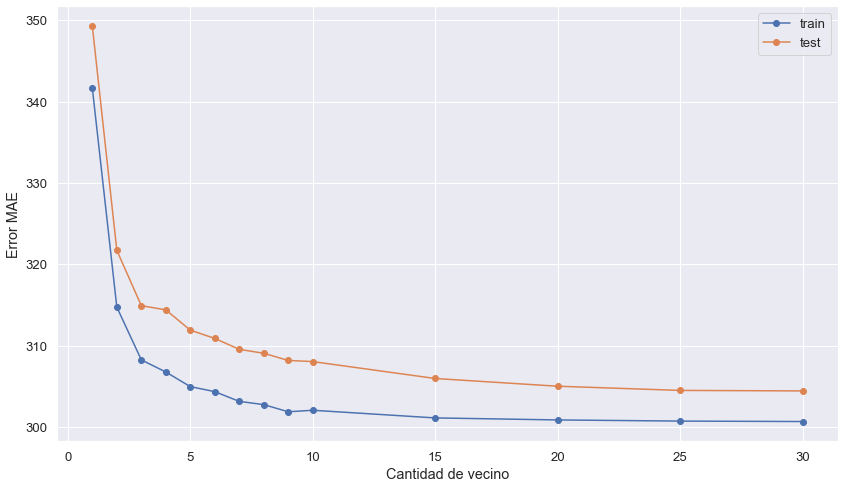

In [85]:
plt.figure(figsize=(14,8))
plt.plot(k_vecinos,lista_mae_train,'o-',label='train' )
plt.plot(k_vecinos,lista_mae_test,'o-',label='test')
plt.legend()
plt.xlabel('Cantidad de vecino')
plt.ylabel('Error MAE')

In [86]:
from sklearn.tree import DecisionTreeRegressor
#Identificamos mejor la cantidad adecuada de la maxima profundidad.
# Definimos las listas vacias para los valores de accuracy deseados
lista_mae_train = []
lista_mae_test = []

# Definimos la lista de valores de k que vamos a explorar
max_depth = [1,2,3,4,5,6,7,8,9,10,15,20]

# Generamos un loop sobre los distintos valores de k 
for k in max_depth:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    tree = DecisionTreeRegressor(max_depth=k, random_state=42)
    
    # Entrenar el modelo
    tree.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = tree.predict(X_train)
    train_mae = np.sqrt(mean_absolute_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = tree.predict(X_test)
    test_mae = np.sqrt(mean_absolute_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_mae_train.append(train_mae)
    lista_mae_test.append(test_mae)

Text(0, 0.5, 'Error MAE')

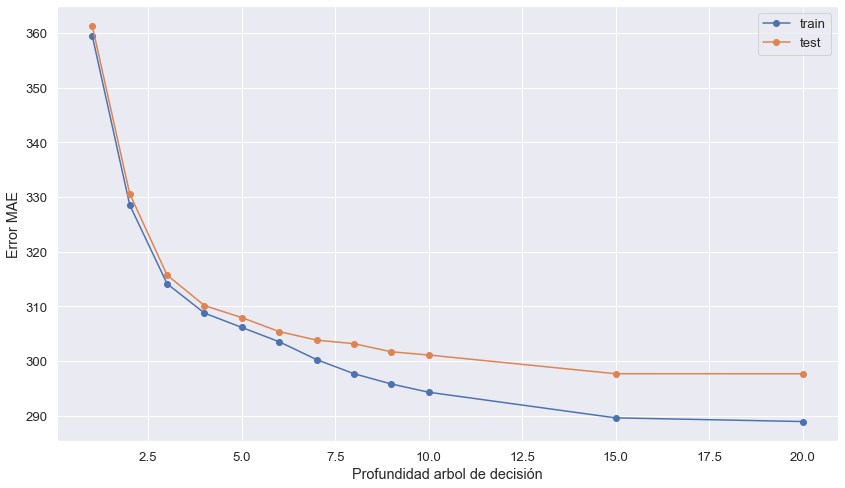

In [87]:
plt.figure(figsize=(14,8))
plt.plot(max_depth,lista_mae_train,'o-',label='train' )
plt.plot(max_depth,lista_mae_test,'o-',label='test')
plt.legend()
plt.xlabel('Profundidad arbol de decisión')
plt.ylabel('Error MAE')

Una vez observadas las dos gráficas podemos definir los siguientes parametros:

-Mejor cantidad de vecinos cercanos: 9 vecinos.

-Mejor profundidad para el arbol de decisión: 7

Luego podemos proceder con el modelo de machine learning utilizando los valores seleccionados.

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=7, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=9)

In [89]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9)

In [90]:
print("Intercepción: ", linear_model.intercept_)
print("Pendiente: ", linear_model.coef_[0])


Intercepción:  13037.40767138236
Pendiente:  2630.4146956987965


Modelo: Regresión lineal
Promedio error absoluto(MAE) en Train: 96154.75288767644
Promedio error absoluto(MAE) en Test: 96822.3043494928


/Users/feliorelo/opt/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/feliorelo/opt/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


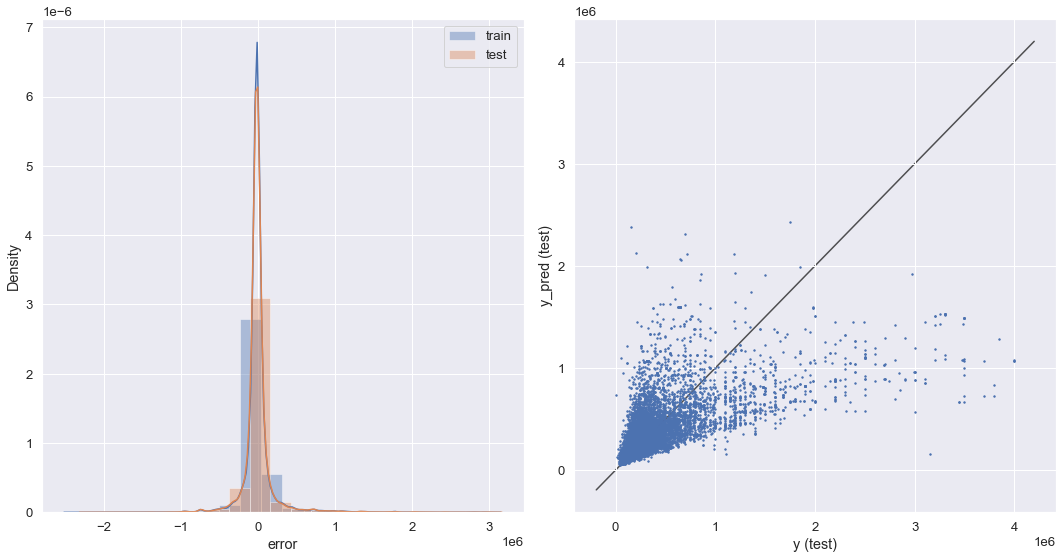

Modelo: Árbol de Decisión
Promedio error absoluto(MAE) en Train: 90154.17615355077
Promedio error absoluto(MAE) en Test: 92307.58709023576


/Users/feliorelo/opt/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/feliorelo/opt/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


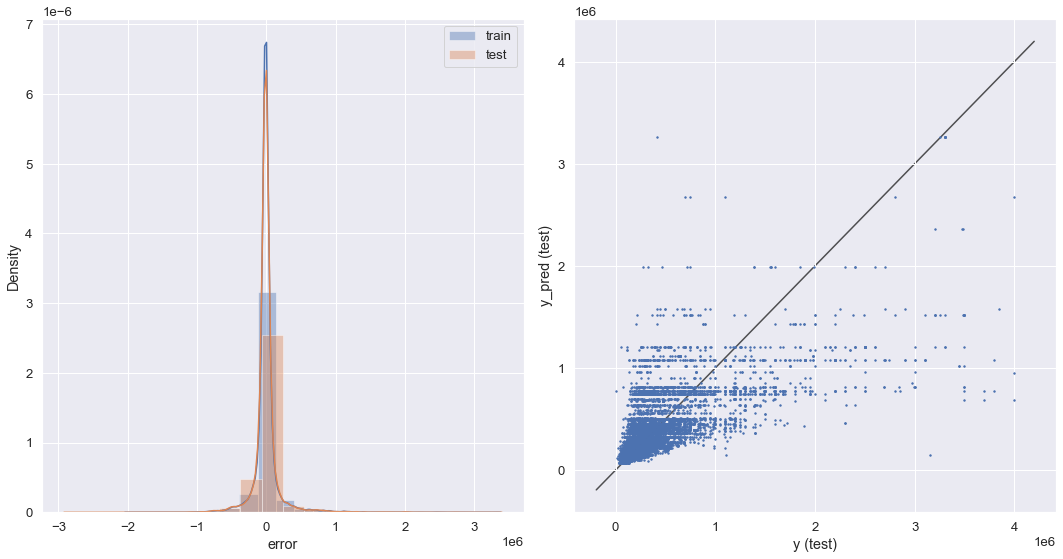

Modelo: Vecinos más cercanos
Promedio error absoluto(MAE) en Train: 91118.25709370965
Promedio error absoluto(MAE) en Test: 94969.35457637344


/Users/feliorelo/opt/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/feliorelo/opt/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


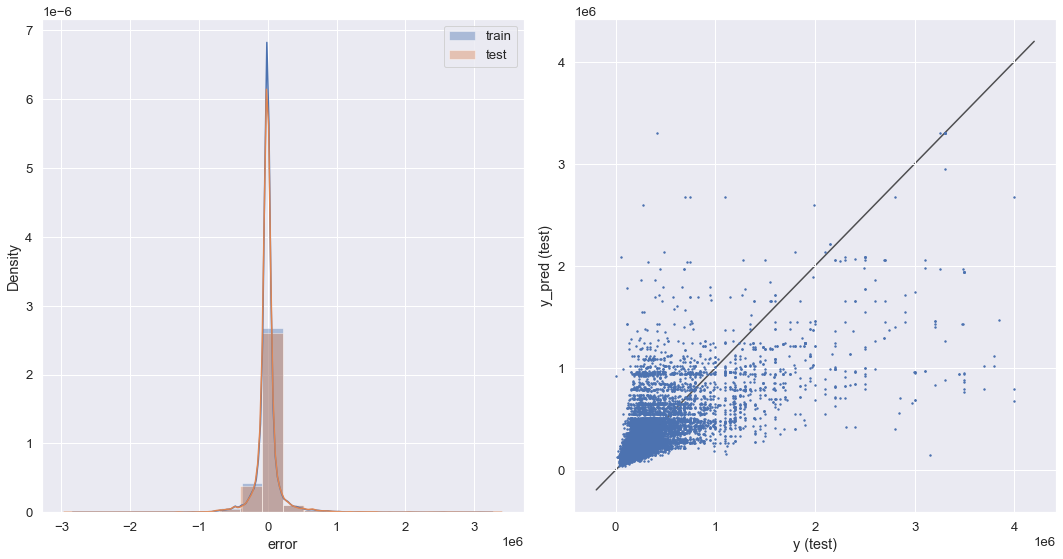

In [91]:
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error



import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    #rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    #rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    #r2_train = r2_score(y_train, y_train_pred)
    #r2_test = r2_score(y_test, y_test_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    


    #print(f'Raíz del error cuadrático medio(RMSE) en Train: {rmse_train}')
    #print(f'Raíz del error cuadrático medio(RMSE) en Test: {rmse_test}')
    #print(f'r2 en Train: {r2_train}')
    #print(f'r2 en Test: {r2_test}')
    print(f'Promedio error absoluto(MAE) en Train: {mae_train}')
    print(f'Promedio error absoluto(MAE) en Test: {mae_test}')
    
    
    plt.figure(figsize = (15,8))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('error')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

Podemos observar que el modelo de regresión del tipo arbol de decisión es el más adecuado para predecir en nuestro proyecto. En el mismo se opto por evaluar el error absoluto promedio (MAE), este ultimo nos muestra de una manera mas acertada el comportamiento del error ya que no es tan sensible a los valores atípicos como el error cuadrático medio.

En mi caso eligiria el modelo de arbol de decisión ya que obtuvo el menor error, de igual manera no descartaría el modelo de vecinos mas cercanos no solo por que el error fue muy cercano, si no por que en caso de utilizar una mayor cantidad de filtros y limpiar nuestro dataset podríamos obtener un cambio en los errores y es posible que el modelo de vecinos mas cercanos tenga un error menor.

**Modelo de Benchmarking**

En este caso ya que no tengo la experiencia para elegir un modelo externo de benchmarking, se me ocurrió la idea de crear uno propio utilizando dos variables para predecir nuestro precio, en este caso la cantidad de superficie total y la cantidad de baños. 

In [92]:
xx1 = d3['surface_total']
xx2 = d3['bathrooms']
y = d3.price

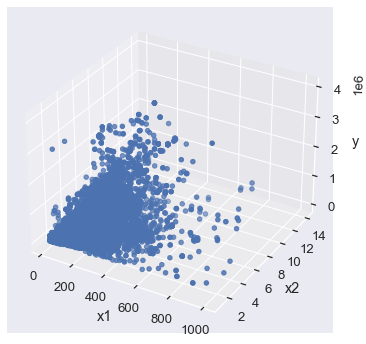

In [93]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_scatter(xx1, xx2, y, ax=None, fig = None):
    if (fig is None) and (ax is None):
        fig = plt.figure(figsize = (8,6))
        ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xx1, xx2, y)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

plot_3d_scatter(xx1, xx2, y, ax=None, fig = None)

Observamos en la gráfica la dispersión de los datos, en este caso utilizando una gráfica de 3 dimensiones.

In [94]:
X = np.vstack((xx1,xx2)).T

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 2) (56713,) (24306, 2) (24306,)


In [95]:
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=7, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=9)

In [96]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9)

In [97]:
print(linear_model.coef_, linear_model.intercept_)

[  1792.45489814 117299.0636781 ] -89674.22347676591


Modelo: Regresión lineal
Promedio error absoluto(MAE) en Train: 95160.71977914392
Promedio error absoluto(MAE) en Test: 95961.65648038234


/Users/feliorelo/opt/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/feliorelo/opt/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


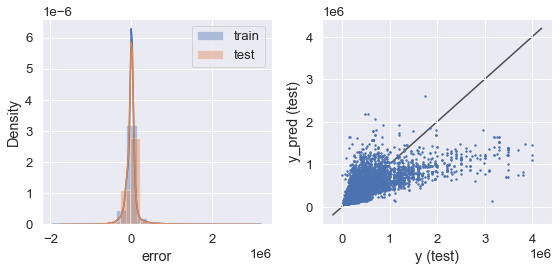

Modelo: Árbol de Decisión
Promedio error absoluto(MAE) en Train: 81047.95146003074
Promedio error absoluto(MAE) en Test: 83064.07454108137


/Users/feliorelo/opt/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/feliorelo/opt/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


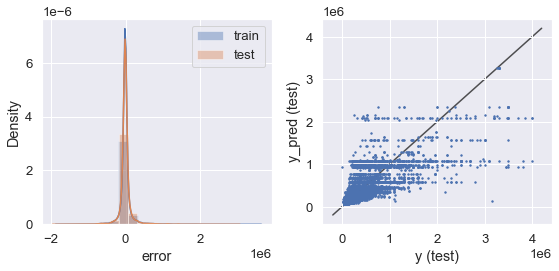

Modelo: Vecinos más cercanos
Promedio error absoluto(MAE) en Train: 78212.95745439515
Promedio error absoluto(MAE) en Test: 82824.85608948865


/Users/feliorelo/opt/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/feliorelo/opt/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


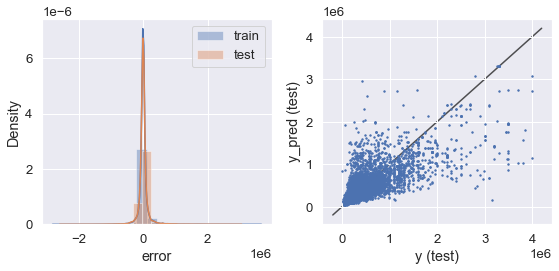

In [98]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
   
    
   
    print(f'Promedio error absoluto(MAE) en Train: {mae_train}')
    print(f'Promedio error absoluto(MAE) en Test: {mae_test}')

    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('error')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

En este caso con dos variables que muestran una elevada correlación con el precio, podemos demostrar que se obtiene un error mas pequeño, y en este caso el modelo que obtuvo un menor error es el modelo de vecinos mas cercanos.

Nuestro segundo modelo de benchmarking obtuvo un mejor puntaje.

**Optimización posibles y crítica al modelo**

Estoy seguro que existen una gran cantidad de datos que podrian ayudar a dar una mejor precisión a nuestro modelo que en este caso estamos omitiendo. Existen extras en nuestros inmuebles que no estamos teniendo en cuenta a la hora de observar los precios, como por ejemplo pileta, estacionamiento, seguridad, gimnasio, etc. Además de esto tambien se podria realizar un filtrado por barrio ya que como observamos en el desafio existe una gran diferencia de valores por m2 por barrio, en este caso al estudiar todos los inmuebles como si fueran de capital federal se incurre en un sesgo mayor.
Otra optimización que podriamos hacer es observar los datos que tienen errores muy grandes y analizar las razones, si existe algo que los diferencie del resto de los datos. Finalmente, utilizar estas evidencias para crear nuevos filtros y mejorar nuestro modelo.
